<div style = "  display : flex; justify-content: center; ">
    <h1 style = " background-color: Black; color:white; display:flex; padding:10px"> Logistic_Regression 
</h1>
 </div>

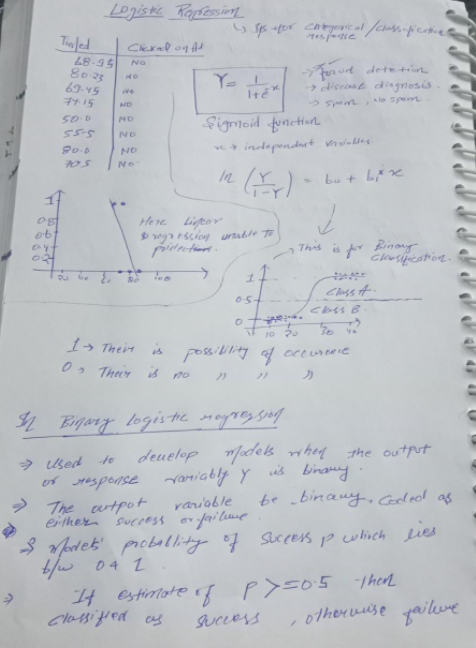

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
dtt = pd.read_csv("Data_set/Social_Network_Ads.csv")

In [5]:
dtt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dtt.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
dtt.shape

(400, 5)

In [8]:
dtt.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<AxesSubplot:ylabel='EstimatedSalary'>

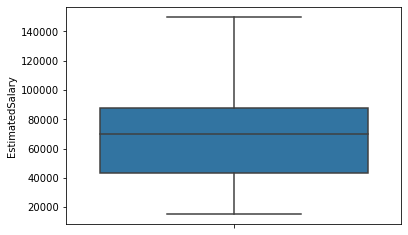

In [9]:
# checking for outlier
sns.boxplot(  y = 'EstimatedSalary' , data = dtt  )

In [19]:
cat_to_num = pd.get_dummies(dtt.Gender)
final_data = pd.concat([dtt , cat_to_num] , axis = 1)
final_data = final_data.drop(["Male" , "Gender"] , axis = 1)
final_data

,User ID,Age,EstimatedSalary,Purchased,Female
0,15624510,19,19000,0,0
1,15810944,35,20000,0,0
2,15668575,26,43000,0,1
3,15603246,27,57000,0,1
4,15804002,19,76000,0,0
...,...,...,...,...,...
395,15691863,46,41000,1,1
396,15706071,51,23000,1,0
397,15654296,50,20000,1,1
398,15755018,36,33000,0,0


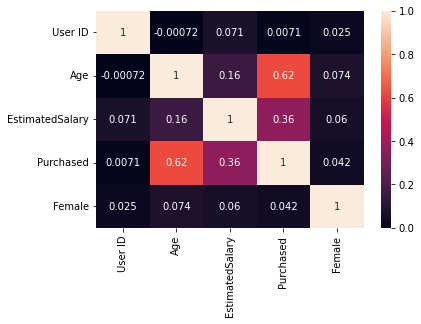

In [21]:
corr = final_data.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [23]:
x = final_data.drop(['Purchased'] , axis = 1) # except from purchase
y = final_data.Purchased  # only purchase column

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [26]:
x

,User ID,Age,EstimatedSalary,Female
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,1
3,15603246,27,57000,1
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,0
397,15654296,50,20000,1
398,15755018,36,33000,0


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,train_size =  3/4)

In [33]:
display(x_train.shape,y_train.shape)
display(x_test.shape,y_test.shape)

(300, 4)

(300,)

(100, 4)

(100,)

In [35]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr = logr.fit(x_train , y_train)

In [39]:
y_predict = logr.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [40]:
y_test

269    0
5      0
384    1
145    0
287    1
      ..
179    0
10     0
363    0
290    1
322    0
Name: Purchased, Length: 100, dtype: int64

In [50]:
display(logr.score(x_train , y_train))
display(logr.score(x_test, y_test))
#  We can get that value by Confusion matrix

0.77

0.81

In [53]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test , y_predict)
cm

array([[65,  2],
       [17, 16]], dtype=int64)

0.81